In [135]:
import requests
import time


In [154]:
EAP_start = 1827
EAP_end = 1849
EAP_major_works = [1831, 1839, 1843, 1845, 1846, 1849]
HPL_start = 1910
HPL_end = 1943
HPL_major_works = [1928, 1936, 1943]
MWS_start = 1818
MWS_end = 1837
MWS_major_works = [1818, 1823, 1826, 1830, 1835, 1837]

In [153]:
ngram_data_regex = re.compile(r'imeseries\": \[(\d|\.|\s|,|e|-)*\]')

In [155]:
def get_ngram_frequency_from_request(request, regex):
    results = []
    frequencies = regex.search(request.text).group()
    frequencies = frequencies[13:-1]
    frequencies = frequencies.split(", ")
    frequencies = [float(f) for f in frequencies]
    results.append(np.mean([f for f in frequencies[EAP_start-1818:EAP_end-1818] if f>0]))
    results.append(np.mean([f for f in frequencies[HPL_start-1818:HPL_end-1818] if f>0]))
    results.append(np.mean([f for f in frequencies[MWS_start-1818:MWS_end-1818] if f>0]))
    return results

In [162]:
token_list = []
stopWords = set(stopwords.words('english'))
for sentence in df.text:
    tokens = tokenize.word_tokenize(sentence)
    tokens = [t for t in tokens if len(t)>1 and t not in stopWords]
    token_list.append(tokens)

In [163]:
lexicon = set()
for sentence in token_list:
    lexicon.update(sentence)

In [164]:
len(lexicon)

27575

In [180]:
def get_lexicon_frequencies(lexicon):
    lexicon_frequencies = []
    error_counter = 0
    sleep_time = 1
    BASEURL = "https://books.google.com/ngrams/graph?content={}&year_start=1818&year_end=1943&corpus=16&smoothing=0"
    for n, word in enumerate(lexicon):
        if n%1378 == 1:
            print("{}% done!".format(round(len(lexicon)/n), 2))
        if error_counter > 8:
            print("too many errors. Sleep time = {}".format(sleep_time))
            break
        request = requests.get(BASEURL.format(word))
        if request.status_code != 200:
            error_counter += 1
            time.sleep(sleep_time)
            request = requests.get(BASEURL.format(word))
            if request.status_code != 200:
                error_counter += 1
                print("two consecutive errors")
                print(request.status_code, request.text)
                time.sleep(300)
                sleep_time *= 2
        ngram_frequencies = get_ngram_frequency_from_request(request, ngram_data_regex)
        lexicon_frequencies.append((word, ngram_frequencies))
        time.sleep(sleep_time)
    return lexicon_frequencies

In [182]:
len(lexicon_frequencies)

22

In [181]:
lexicon_frequencies = get_lexicon_frequencies(lexicon)
pd.DataFrame(lexicon_frequencies).to_csv('lexicon_frequencies.csv')

two consecutive errors
429 Please try again later.


AttributeError: 'NoneType' object has no attribute 'group'

In [144]:
import string
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
min(min(EAP_major_works), min(MWS_major_works), min(HPL_major_works))

1818

In [130]:
max(max(EAP_major_works), max(MWS_major_works), max(HPL_major_works))

1943

In [131]:
licked_frequencies = get_ngram_frequency('licked')
print(licked_frequencies)

[1.47860579214797e-06, 6.053814049113443e-06, 1.219009303697835e-06]


In [63]:
import pandas as pd
df = pd.read_csv(filename, index_col='id')
df.head()

,text,author
id,,
id26305,"This process, however, afforded me no means of...",EAP
id17569,It never once occurred to me that the fumbling...,HPL
id11008,"In his left hand was a gold snuff box, from wh...",EAP
id27763,How lovely is spring As we looked from Windsor...,MWS
id12958,"Finding nothing else, not even gold, the Super...",HPL


In [71]:
for author in ['EAP', 'MWS', 'HPL']:
    print("Average length of sentences by {}: {}".format(author, np.mean([len(t) for t in df[df['author']==author].text])))

Average length of sentences by EAP: 142.22594936708862
Average length of sentences by MWS: 151.65982792852415
Average length of sentences by HPL: 155.84347826086957


In [126]:
for author in ['EAP', 'MWS', 'HPL']:
    print("Average characters per word by {}: {}"
          .format(author, (sum([len(t) for t in df[df['author']==author].text])/
                           (sum([len(t.split(" ")) for t in df[df['author']==author].text])))))

Average characters per word by EAP: 5.590114181944824
Average characters per word by MWS: 5.5315430571480295
Average characters per word by HPL: 5.605952084570159


In [73]:
for author in ['EAP', 'MWS', 'HPL']:
    print("Number of strings containing the word 'gods' by {}: {}".format(author, sum(['gods' in t for t in df[df['author']==author].text])))

Number of strings containing the word 'gods' by EAP: 4
Number of strings containing the word 'gods' by MWS: 3
Number of strings containing the word 'gods' by HPL: 38


In [127]:
for author in ['EAP', 'MWS', 'HPL']:
    print("Number of strings containing the word 'whence' by {}: {}".format(author, sum(['whence' in t.lower() for t in df[df['author']==author].text])))

Number of strings containing the word 'whence' by EAP: 9
Number of strings containing the word 'whence' by MWS: 8
Number of strings containing the word 'whence' by HPL: 10


In [134]:
for author in ['EAP', 'MWS', 'HPL']:
    print("Number of strings containing a semicolon by {}: {}".format(author, sum([';' in t for t in df[df['author']==author].text])))

Number of strings containing a semicolon by EAP: 1084
Number of strings containing a semicolon by MWS: 1969
Number of strings containing a semicolon by HPL: 1084


In [83]:
for author in ['EAP', 'MWS', 'HPL']:
    print("Number of strings by {}: {}".format(author, df[df['author']==author].shape[0]))
    print("Number of words by {}: {}".format(author, sum([len(t.split(" ")) for t in df[df['author']==author].text])))
    print("Average words per string: {}".format((sum([len(t.split(" ")) for t in df[df['author']==author].text]))/df[df['author']==author].shape[0]))

Number of strings by EAP: 7900
Number of words by EAP: 200995
Average words per string: 25.44240506329114
Number of strings by MWS: 6044
Number of words by MWS: 165710
Average words per string: 27.417273328921244
Number of strings by HPL: 5635
Number of words by HPL: 156651
Average words per string: 27.799645075421473


In [93]:
from nltk import tokenize

In [94]:
tokenize.word_tokenize(df.text[0])

['This',
 'process',
 ',',
 'however',
 ',',
 'afforded',
 'me',
 'no',
 'means',
 'of',
 'ascertaining',
 'the',
 'dimensions',
 'of',
 'my',
 'dungeon',
 ';',
 'as',
 'I',
 'might',
 'make',
 'its',
 'circuit',
 ',',
 'and',
 'return',
 'to',
 'the',
 'point',
 'whence',
 'I',
 'set',
 'out',
 ',',
 'without',
 'being',
 'aware',
 'of',
 'the',
 'fact',
 ';',
 'so',
 'perfectly',
 'uniform',
 'seemed',
 'the',
 'wall',
 '.']

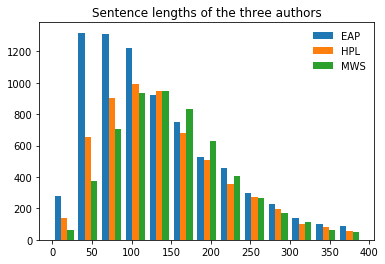

In [123]:
import matplotlib.pyplot as plt
plt.figure()
EAP_sentence_lengths = [len(t) for t in df[df['author']=='EAP'].text]
HPL_sentence_lengths = [len(t) for t in df[df['author']=='MWS'].text]
MWS_sentence_lengths = [len(t) for t in df[df['author']=='HPL'].text]
labels = ['EAP', 'HPL', 'MWS']
H = plt.hist([EAP_sentence_lengths, HPL_sentence_lengths, MWS_sentence_lengths], label=labels, bins=[i for i in range(0, 400, 30)])
containers = H[-1]
leg = plt.legend(frameon=False)
plt.title("Sentence lengths of the three authors")
plt.show()

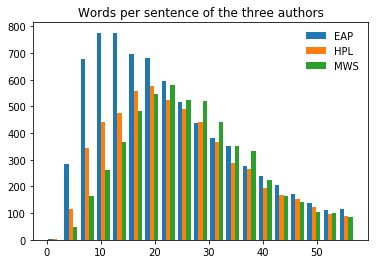

In [125]:
import matplotlib.pyplot as plt
plt.figure()
EAP_word_counts = [len(t.split(" ")) for t in df[df['author']=='EAP'].text]
HPL_word_counts = [len(t.split(" ")) for t in df[df['author']=='MWS'].text]
MWS_word_counts = [len(t.split(" ")) for t in df[df['author']=='HPL'].text]
labels = ['EAP', 'HPL', 'MWS']
H = plt.hist([EAP_word_counts, HPL_word_counts, MWS_word_counts], label=labels, bins=[i for i in range(0, 60, 3)])
containers = H[-1]
leg = plt.legend(frameon=False)
plt.title("Words per sentence of the three authors")
plt.show()